# CNN Model: Multiple Heterogeneous Kernel Sizes & LSTM

In [ ]:
#get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
import pandas as pd
import numpy as np
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers

# load numpy array from csv file
from numpy import loadtxt

#plotting performance
import matplotlib.pyplot as plt

## Load prepared dataset

In [ ]:
# load array
X = loadtxt('/content/drive/MyDrive/data/X.csv', delimiter=',')
y = loadtxt('/content/drive/MyDrive/data/y.csv', delimiter=',')

# print the array
print(X)
print(y)

[[2.5500e+02 1.2175e+04 4.5290e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.5500e+02 4.6240e+03 2.0400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0710e+03 2.2600e+02 3.8400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [4.8200e+02 1.5190e+03 2.3740e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0380e+04 4.2600e+02 3.6280e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 5.5100e+02 5.6530e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Split sample into 80% training, 10% test & 10% validation datasets
Next, 10% of the data was split off for testting, 10% for validation and the remaining 80% was used as for training data.

In [ ]:
from sklearn.model_selection import train_test_split

#first split data for training and test data (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (11977, 255)
Training labels shape: (11977, 76)
Validation data shape: (1497, 255)
Validation labels shape: (11977, 76)
Test data shape: (1498, 255)
Test labels shape: (1498, 76)


In [ ]:
max_words = 14953

In [ ]:
seq_len = 255

## CNN Model

In [ ]:
CNN_model = tf.keras.Sequential()

In [ ]:
CNN_model.add(layers.Embedding(input_dim=max_words, 
                           output_dim=82,
                           input_length=seq_len))

In [ ]:
CNN_model.add(layers.LSTM(82, return_sequences=True))

In [ ]:
#CNN_model.add(layers.Reshape((64, 0))) #we need to reshape our data for LSTM. It expects (batch_size, num_timesteps or sequence_length, num_features)

In [ ]:
CNN_model.add(layers.Conv1D(128, 5, activation='relu'))

In [ ]:
CNN_model.add(layers.Conv1D(64, 5, activation='relu'))

In [ ]:
CNN_model.add(layers.GlobalMaxPooling1D())

In [ ]:
CNN_model.add(layers.Dense(10, activation='relu'))

In [ ]:
CNN_model.add(layers.Dense(y.shape[1], activation='softmax'))

In [ ]:
CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 255, 82)           1226146   
                                                                 
 lstm_3 (LSTM)               (None, 255, 82)           54120     
                                                                 
 conv1d_6 (Conv1D)           (None, 251, 128)          52608     
                                                                 
 conv1d_7 (Conv1D)           (None, 247, 64)           41024     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                      

In [ ]:
CNN_history = CNN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
375/375 [==============================] - 41s 69ms/step - loss: 3.3450 - accuracy: 0.1185 - val_loss: 2.9063 - val_accuracy: 0.2258
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 2.6091 - accuracy: 0.2842 - val_loss: 2.6605 - val_accuracy: 0.2872
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 2.1836 - accuracy: 0.3781 - val_loss: 2.7636 - val_accuracy: 0.3026
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 1.8480 - accuracy: 0.4600 - val_loss: 3.0363 - val_accuracy: 0.3046
Epoch 5/10
375/375 [==============================] - 6s 17ms/step - loss: 1.5261 - accuracy: 0.5543 - val_loss: 3.2935 - val_accuracy: 0.3373
Epoch 6/10
375/375 [==============================] - 6s 17ms/step - loss: 1.2297 - accuracy: 0.6292 - val_loss: 3.9686 - val_accuracy: 0.3273
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.9875 - accuracy: 0.7004 - val_loss: 4.6882 - val_accuracy: 0.331

In [ ]:
loss_and_metrics = CNN_model.evaluate(X_test, y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

47/47 - 1s - loss: 7.1694 - accuracy: 0.3652 - 599ms/epoch - 13ms/step
Test Loss 7.169389724731445
Test Accuracy 0.36515355110168457


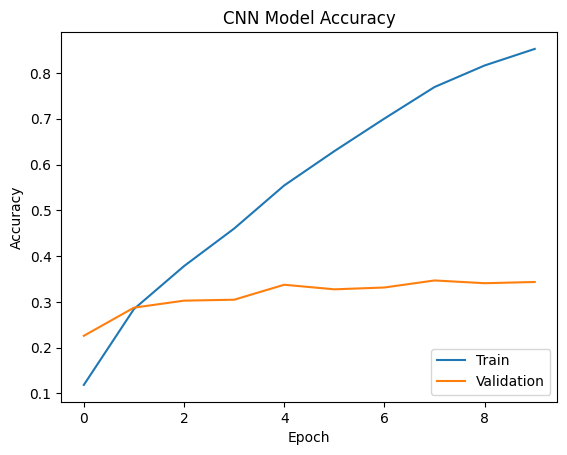

In [ ]:
# Plot training & validation accuracy values
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

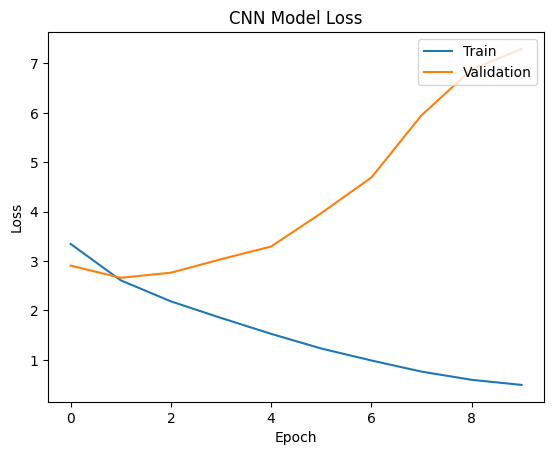

In [ ]:
# Plot training & validation loss values
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
CNN_model.save('/content/drive/MyDrive/data/cnn_lstm_model')